In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np
import time
import math
import csv

In [2]:
import CMGDB

In the first example we run the code using a map defined in the C++ code. In this example
the map is the Leslie map. First we define parameters for the code.

In [3]:
subdiv_min = 20 # Min number of subdivision of phase space
subdiv_max = 30 # Max number of subdivision of phase space
lower_bounds = [-0.001, -0.001] # Lower bounds of the bounding box in phase space
upper_bounds = [90.0, 70.0] # Upper bounds of the bounding box in phase space
params = [19.6, 23.68] # Parameter for Leslie map

morse_fname = 'morse.csv' # File name to save Morse sets

Next we run the code using to compute the Morse sets using the parameter defined above.

In [4]:
%%time
morse_graph = CMGDB.MorseGraphIntvalMap(subdiv_min, subdiv_max, lower_bounds,
                                        upper_bounds, params, morse_fname)

CPU times: user 3.44 s, sys: 375 ms, total: 3.82 s
Wall time: 3.93 s


Plot the Morse graph.

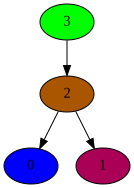

In [5]:
CMGDB.PlotMorseGraph(morse_graph)

The Morse sets are saved in the file specified above. Load this file and plot the Morse sets.

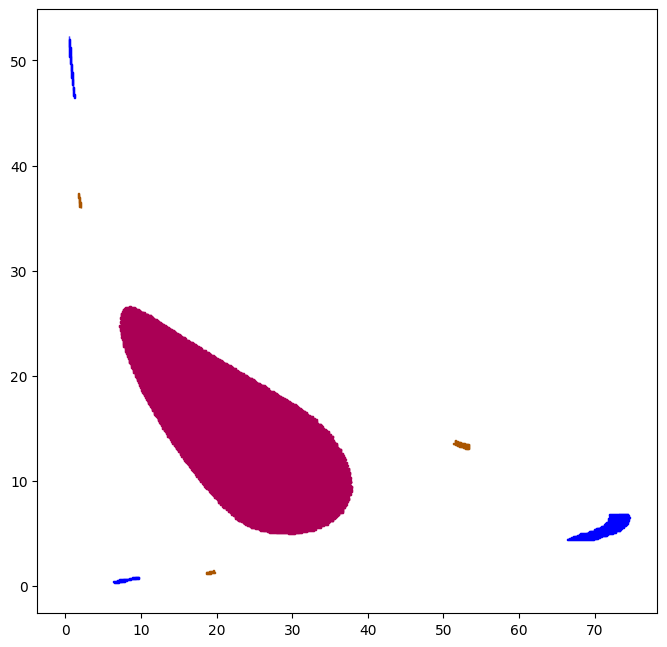

In [6]:
morse_sets = CMGDB.LoadMorseSetFile(morse_fname)

CMGDB.PlotMorseSets(morse_sets)

In the next example we run the code again with the Leslie map, but this time we define
the map as a Python function and pass that function to the C++ code.

In [7]:
# Leslie map
def F(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * math.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

In [8]:
# Define de parameters for this map
subdiv_min = 20
subdiv_max = 30
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

morse_fname = 'morse.csv'

In [9]:
%%time
morse_graph = CMGDB.MorseGraphMap(subdiv_min, subdiv_max, lower_bounds,
                                  upper_bounds, morse_fname, F)

CPU times: user 8.35 s, sys: 474 ms, total: 8.83 s
Wall time: 9.34 s


We can select a colormap to plot the Morse graph and the Morse sets. It is important to select the same colormap for the Morse graph and the Morse sets so they have matching colors.

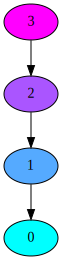

In [10]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

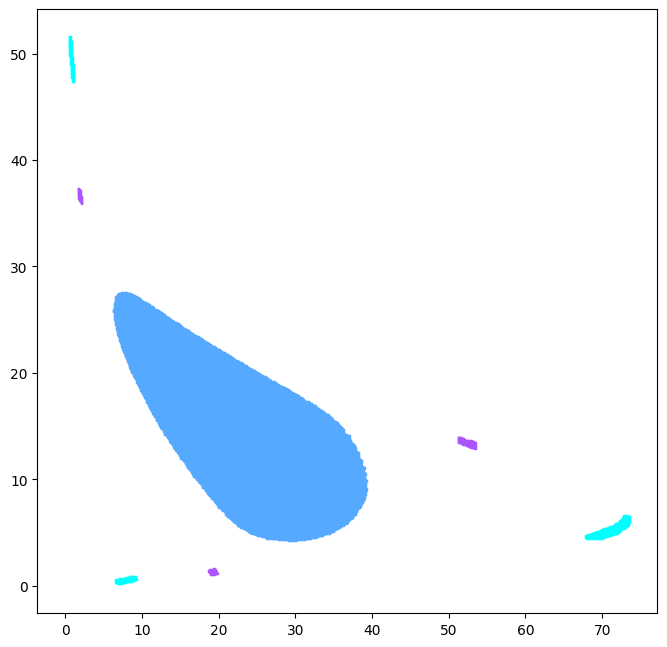

In [11]:
# We can just pass the file name to plot the Morse sets
CMGDB.PlotMorseSets(morse_fname, cmap=matplotlib.cm.cool)

In the next example we use only a single level of subdivision. For this we create
a model with only one parameter indicating the number of subdivisions. We agian use the
Leslie map defined above.

In [12]:
phase_subdiv = 20
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

The function below returns the Morse graph and a digraph representing the
multi-valued map defined on the grid in phase space. The digraph representing
the multi-valued map is computed only on the final grid representing where the
Morse sets are computed, hence it only returns the multi-valued map in the whole
phase space if the model is constructed with a single level of subdivision as
above.

In [13]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 29.1 s, sys: 274 ms, total: 29.3 s
Wall time: 30.4 s


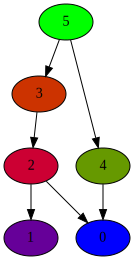

In [14]:
CMGDB.PlotMorseGraph(morse_graph)

We can also plot all or some of the Morse sets from the Morse graph.

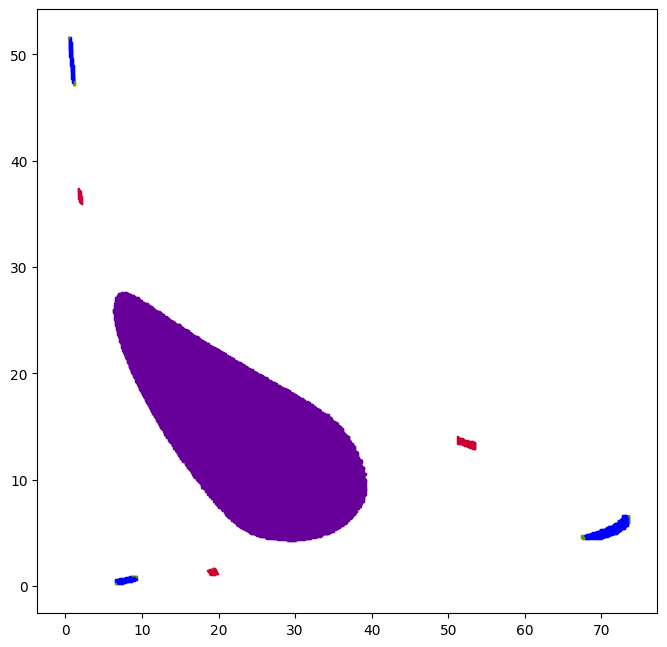

In [15]:
CMGDB.PlotMorseSets(morse_graph)

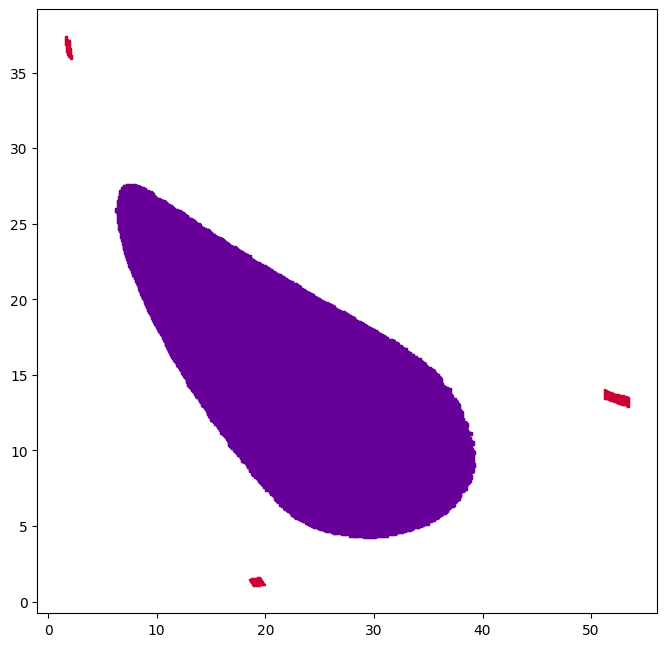

In [17]:
# Plot only Morse nodes 1 and 2
CMGDB.PlotMorseSets(morse_graph, morse_nodes=[1, 2])

With the commands below we can get information about the Morse graph and the map graph.

In [18]:
# Number of vertices in the Morse graph
morse_graph.num_vertices()

6

In [19]:
# The vertices in the Morse graph (always from 0 to N-1)
morse_graph.vertices()

[0, 1, 2, 3, 4, 5]

We can also get the edges in the Morse graph with the command below. Here the Morse
graph is transitively reduced.

In [20]:
# Edges in the Morse graph
morse_graph.edges()

[(2, 1), (2, 0), (3, 2), (4, 0), (5, 3), (5, 4)]

In [21]:
# Get the adjacencies of node 3
morse_graph.adjacencies(3)

[2]

We can also get the edges and adjacencies in the not transitively reduced Morse graph, that is, the reachability information on the Morse sets.

In [24]:
# Unreduced Morse graph edges
morse_graph.edges_unreduced()

[(5, 0),
 (5, 1),
 (5, 4),
 (3, 2),
 (2, 0),
 (5, 2),
 (2, 1),
 (5, 3),
 (4, 0),
 (3, 0),
 (3, 1)]

In [25]:
# Unreduced adjacencies of node 3
morse_graph.adjacencies_unreduced(3)

[2, 0, 1]

In [26]:
# Get the indices of the nodes in Morse set 4
# These are the indices in phase space grid
morse_graph.morse_set(4)

[668706,
 668704,
 668023,
 668022,
 668019,
 668018,
 668007,
 668006,
 668003,
 668002,
 667959,
 659473,
 659472,
 659465,
 659462,
 659461,
 659460,
 659459,
 659457,
 572091,
 572090,
 572079,
 572078,
 283943,
 283941,
 283940,
 279990,
 279987,
 279986,
 279975,
 279974,
 279972,
 279971,
 279969,
 10451,
 10450,
 10449,
 10363,
 10361,
 10355,
 10353,
 10331,
 10329,
 8334,
 8333]

In [27]:
# Get lower and upper bounds of boxes in Morse set 4
# The first half are the lower bounds for all the variables
# and the second half are the upper bounds
morse_graph.morse_set_boxes(4)

[[6.502978515625, 0.2040810546875, 6.5908701171875, 0.27244140625],
 [6.5908701171875, 0.135720703125, 6.67876171875, 0.2040810546875],
 [8.612376953125, 0.8876845703125, 8.7002685546875, 0.956044921875],
 [8.7002685546875, 0.8876845703125, 8.78816015625, 0.956044921875],
 [8.78816015625, 0.8876845703125, 8.8760517578125, 0.956044921875],
 [8.8760517578125, 0.8876845703125, 8.963943359375, 0.956044921875],
 [8.963943359375, 0.8876845703125, 9.0518349609375, 0.956044921875],
 [9.0518349609375, 0.8876845703125, 9.1397265625, 0.956044921875],
 [9.1397265625, 0.8876845703125, 9.2276181640625, 0.956044921875],
 [9.2276181640625, 0.81932421875, 9.315509765625, 0.8876845703125],
 [9.2276181640625, 0.8876845703125, 9.315509765625, 0.956044921875],
 [1.05369921875, 47.0992822265625, 1.1415908203125, 47.167642578125],
 [1.1415908203125, 47.0992822265625, 1.229482421875, 47.167642578125],
 [1.05369921875, 47.167642578125, 1.1415908203125, 47.2360029296875],
 [1.1415908203125, 47.167642578125, 1.2

The nodes in the multi-valued graph go from 0 to num_vertices-1, hence we only
return the number of vertices (since it can be very large).

In [28]:
# Number of vertices in the map graph
map_graph.num_vertices()

1048576

Notice that this is $2^{20}$ and 20 is the number of subdivisions.

In [29]:
2**20

1048576

We can get the adjacencies of each node of the graph.

In [30]:
# Adjacencies of vertex 0
map_graph.adjacencies(0)

[0,
 1,
 2,
 3,
 8,
 9,
 10,
 11,
 32,
 33,
 34,
 35,
 40,
 41,
 42,
 43,
 128,
 129,
 130,
 131,
 136,
 137,
 138,
 139,
 160,
 161,
 162,
 163,
 168,
 169,
 170,
 171,
 512,
 513,
 514,
 515,
 520,
 521,
 522,
 523,
 544,
 545,
 546,
 547,
 552,
 553,
 554,
 555,
 640,
 641,
 642,
 643,
 648,
 649,
 650,
 651,
 672,
 673,
 674,
 675,
 680,
 681,
 682,
 683,
 2048,
 2049,
 2050,
 2051,
 2056,
 2057,
 2058,
 2059,
 2080,
 2081,
 2082,
 2083]